> Loading data... 
> Data Loaded. Compiling...
> Compilation Time :  0.03800225257873535
Train on 4232 samples, validate on 223 samples
Epoch 1/1
4232/4232 [==============================] - 17s - loss: 0.1711 - val_loss: 7.9661e-04
Training duration (s) :  26.268502473831177


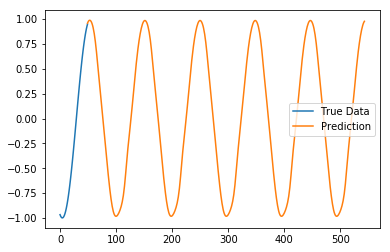

In [4]:
import lstm
import time
import matplotlib.pyplot as plt
import sys
import numpy as np
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(np.float32(true_data), label='True Data')
    plt.plot(range(len(true_data)-1,len(true_data)+len(predicted_data)-1),np.float32(predicted_data), label='Prediction')
    plt.legend()
    plt.show()

def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()

#Main Run Thread
if __name__=='__main__':
    global_start_time = time.time()
    epochs  = 1
    batch_size=512
    seq_len = 50
    predict_steps = 495
    print('> Loading data... ')
    #X_train[batch,t,1]
    X_train, y_train, X_test, y_test = lstm.load_data('sinwave.csv', seq_len, False)
    print('> Data Loaded. Compiling...')
    model = lstm.build_model([1, seq_len,100, 1])

    model.fit(
        X_train,
        y_train,
        batch_size,
        nb_epoch=epochs,
        validation_split=0.05)

    #predict = lstm.predict_sequences_multiple(model, X_test, seq_len, 50)
    predict = lstm.predict_sequence_full(model, X_test[0], predict_steps, seq_len)
#     predict = lstm.predict_point_by_point(model, X_test)        
    print('Training duration (s) : ', time.time() - global_start_time)
    plot_results(predict,X_test[0,:,0])

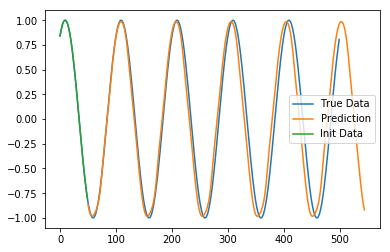

In [5]:
f = open('sinwave.csv', 'rb').read()
data_all = np.float32(f.decode().split('\r\n'))
true_data = X_test[45]
predict = lstm.predict_sequence_full(model, true_data, predict_steps, seq_len)
predicted_data = predict
fig = plt.figure(facecolor='white')
axx = fig.add_subplot(111)
axx.plot(np.float32(data_all[0:500]), label='True Data')

plt.plot(range(len(true_data),len(true_data)+len(predicted_data)),np.float32(predicted_data), label='Prediction')
ax = fig.add_subplot(111)
ax.plot(np.float32(true_data), label='Init Data')

plt.legend()
plt.show()

In [6]:
print(X_test[0].shape)
print(len(X_test))


(50, 1)
495


In [11]:
import numpy as np
f = open('sinwave.csv', 'rb').read()
data_all = np.float32(f.decode().split('\r\n'))
print(data_all[0:50])
predict = lstm.predict_sequence_full(model,data_all[0:50], seq_len)
plot_results(predict,X_test[0,:,0])

[ 0.84147096  0.87373638  0.90255356  0.92780876  0.94940233  0.96724904
  0.98127848  0.99143523  0.99767929  0.99998593  0.99834603  0.9927662
  0.98326832  0.96988994  0.95268387  0.93171799  0.90707505  0.87885225
  0.84716105  0.81212652  0.77388686  0.73259306  0.68840802  0.64150614
  0.59207255  0.54030228  0.48639974  0.43057758  0.37305611  0.31406239
  0.25382918  0.19259425  0.13059922  0.06808878  0.00530962 -0.05749049
 -0.12006371 -0.1821631  -0.24354357 -0.30396289 -0.3631826  -0.42096901
 -0.47709402 -0.53133619 -0.58348137 -0.63332385 -0.68066692 -0.72532368
 -0.76711792 -0.80588466]


IndexError: invalid index to scalar variable.

In [5]:
import lstm
import time
import matplotlib.pyplot as plt
import sys
seq_len = 50
X_train, y_train, X_test, y_test = lstm.load_data('sinwave.csv', seq_len, False) 
print(X_train)
print(y_train)
print(X_test)
print(y_test)
     

[[['0.907075026']
  ['0.878852258']
  ['0.847161063']
  ..., 
  ['-0.969889958']
  ['-0.952683874']
  ['-0.931717983']]

 [['-0.967249058']
  ['-0.98127848']
  ['-0.991435244']
  ..., 
  ['0.90255357']
  ['0.927808777']
  ['0.949402346']]

 [['0.927808777']
  ['0.949402346']
  ['0.967249058']
  ..., 
  ['-0.841470985']
  ['-0.873736397']
  ['-0.90255357']]

 ..., 
 [['-0.688408006']
  ['-0.64150614']
  ['-0.592072543']
  ..., 
  ['0.812126509']
  ['0.773886863']
  ['0.73259304']]

 [['-0.98127848']
  ['-0.991435244']
  ['-0.997679266']
  ..., 
  ['0.927808777']
  ['0.949402346']
  ['0.967249058']]

 [['-0.992766189']
  ['-0.983268329']
  ['-0.969889958']
  ..., 
  ['0.997679266']
  ['0.999985904']
  ['0.998346054']]]
['-0.907075026' '0.967249058' '-0.927808777' ..., '0.688408006'
 '0.98127848' '0.992766189']
[[['-0.967249058']
  ['-0.98127848']
  ['-0.991435244']
  ..., 
  ['0.90255357']
  ['0.927808777']
  ['0.949402346']]

 [['-0.98127848']
  ['-0.991435244']
  ['-0.997679266']
  ...

In [19]:
print(X_test.shape)

(495, 50, 1)


(50,)


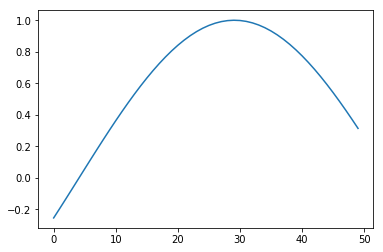

SystemExit: 

In [26]:
import numpy as np
a = np.array(X_test[25,:,0])
print(a.shape)

plt.plot(np.float32(a), label='True Data')
plt.legend()
plt.show()
sys.exit()